# CIFAR_10 using CNN


In [23]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,datasets
import PIL


In [25]:
#Loading the dataset
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [26]:
'''There are totally 60000 datasets in which we divide 50000 for training & 10000 fore testing samples
each class contains 6000 images,each images has 3 rgb color channels and 32 X32 pixel dimensions'''
print("Train_Samples:",train_images.shape,train_labels.shape)
print("Test_Samples:",test_images.shape,test_labels.shape)

Train_Samples: (50000, 32, 32, 3) (50000, 1)
Test_Samples: (10000, 32, 32, 3) (10000, 1)


In [51]:
train_images = train_images / 255.0

test_images = test_images / 255.0

C:\Users\Sushmitha S\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


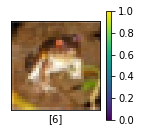

In [52]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

"""The matplotlib function imshow() creates an image from a 2-dimensional numpy array."""

plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.colorbar()
plt.show()

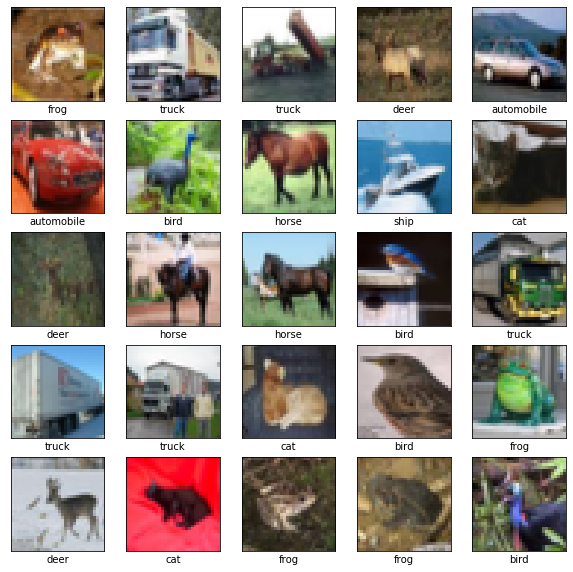

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)#(rows,column,pannel number)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
    

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [58]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 126s 3ms/sample - loss: 1.5300 - accuracy: 0.4414 - val_loss: 1.3417 - val_accuracy: 0.5049
Epoch 2/10
50000/50000 [==============================] - 79s 2ms/sample - loss: 1.1800 - accuracy: 0.5800 - val_loss: 1.0801 - val_accuracy: 0.6154
Epoch 3/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.0392 - accuracy: 0.6318 - val_loss: 1.0271 - val_accuracy: 0.6387
Epoch 4/10
50000/50000 [==============================] - 80s 2ms/sample - loss: 0.9491 - accuracy: 0.6652 - val_loss: 1.0239 - val_accuracy: 0.6433
Epoch 5/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.8718 - accuracy: 0.6939 - val_loss: 0.9448 - val_accuracy: 0.6769
Epoch 6/10
50000/50000 [==============================] - 97s 2ms/sample - loss: 0.8167 - accuracy: 0.7126 - val_loss: 0.9127 - val_accuracy: 0.6849
Epoch 7/10
50000/50000 [==============================]

In [75]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



10000/10000 - 3s - loss: 0.8895 - accuracy: 0.7065

Test accuracy: 0.7065


In [76]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [77]:
predictions = probability_model.predict(test_images)

In [78]:
predictions[0]

array([1.8857846e-04, 2.4562146e-04, 8.9923979e-04, 7.7667427e-01,
       3.4838807e-04, 2.1412998e-01, 6.9312244e-03, 2.6922370e-04,
       2.7936521e-05, 2.8546739e-04], dtype=float32)

In [79]:
np.argmax(predictions[0])

3

In [80]:
test_labels[0]

array([3], dtype=uint8)

In [90]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')


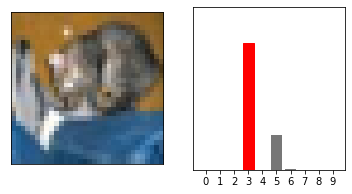

In [95]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

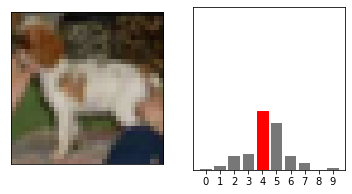

In [92]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

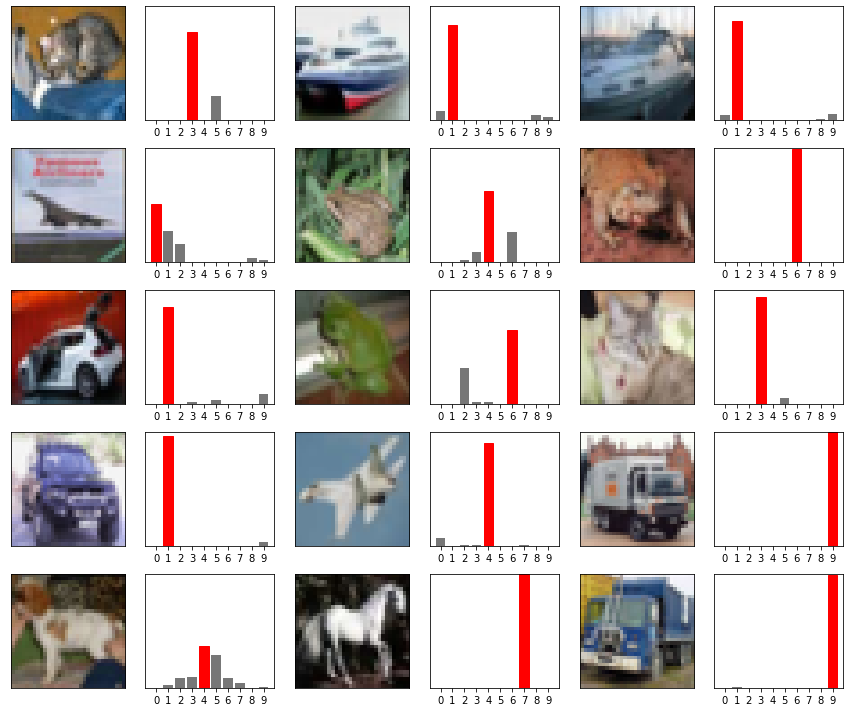

In [96]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()